## Projekt 20 2

## 1. Import

In [467]:
# data manipulation
import numpy as np
import pandas as pd
import datetime as dt
import time
from math import sqrt
from tqdm import tqdm
import holidays

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# feature selection
from sklearn.feature_selection import RFECV

from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures


# budowa Pipeline
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# podział danych na zbiory treningowe/walidacyjne/testowe
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.impute import SimpleImputer
# pcA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import shap

# optimization and hyperparameters
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

# interpretowalność modelu
import shap
shap.initjs()

# zapisanie modelu
import joblib

# settings
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# mlflow
import mlflow
import mlflow.sklearn

## 2. Pobranie danych

In [468]:
#nagłowki sa dopiero w 2 wierszu dlatego parametr hader=1 podczas wczytywania
dataframe = pd.read_excel('default_of_credit_card_clients.xls', header=1)
dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [469]:
dataframe.shape

(30000, 25)

## 3. zrozumienie danych

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
 X6 = the repayment status in September, 2005;
 X7 = the repayment status in August, 2005; . . .;
 X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar).
 X12 = amount of bill statement in September, 2005; 
 X13 = amount of bill statement in August, 2005; . . .; 
 X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar).
 X18 = amount paid in September, 2005;
  X19 = amount paid in August, 2005; . . .
  ;X23 = amount paid in April, 2005.

#### Sprawdzam czy sa puste dane


In [470]:
dataframe.isna().values.any()

False

In [471]:
dataframe.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

#### Sprawdzam typ danych

In [472]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

dane w dataframe są stringami, które zostaną zamienione na wartości numeryczne w dalszych krokach

In [473]:
# sprawdza czy sa zduplikowane rekordy
dataframe.duplicated().any()


False

nie ma zduplikowanych rekordów

In [474]:
# sprawdza czy brakujace rekordy
dataframe.index.equals(pd.RangeIndex(start=0, stop=len(dataframe)))



True

###### nie ma brakujących rekordów

### zamiana stringa na wartości numeryczne

In [475]:
# zamiana strina na wartości numeryczne
dataframe = dataframe.apply(pd.to_numeric, errors='coerce')
dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [476]:
# sprawdzam ponownie typ danych
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

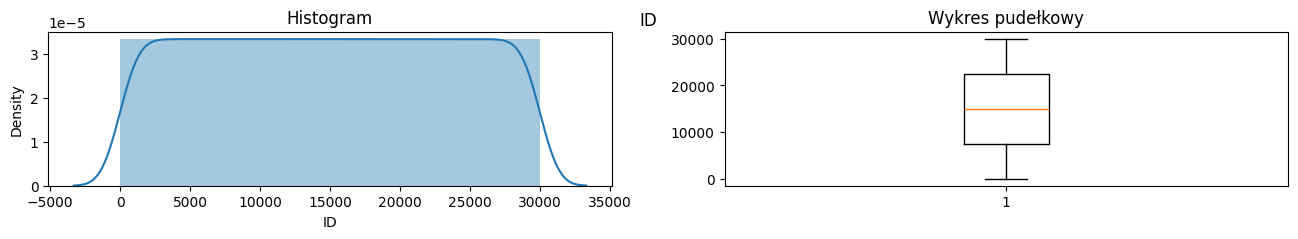

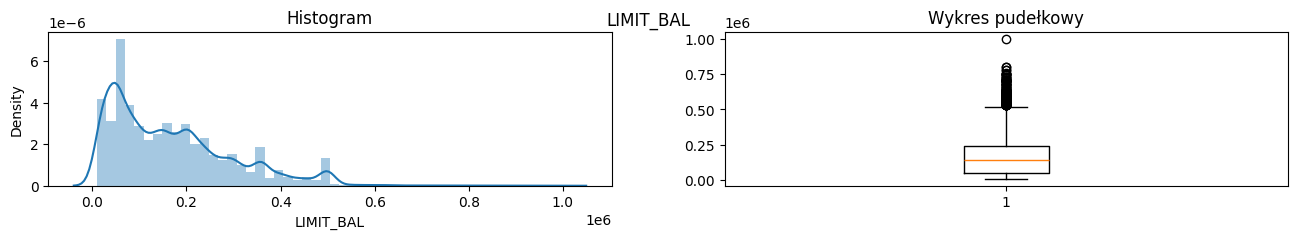

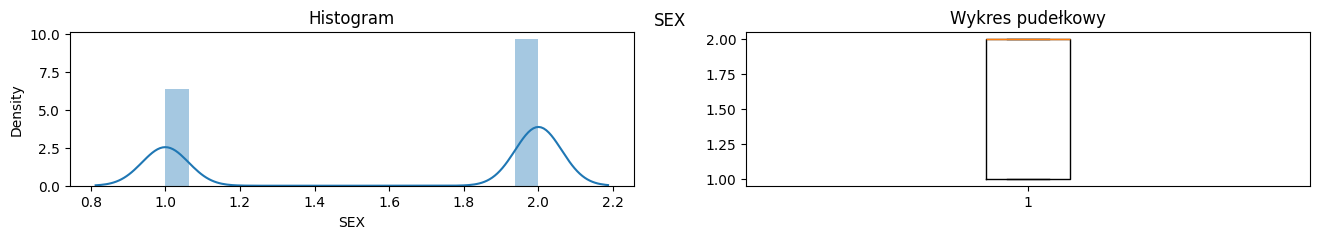

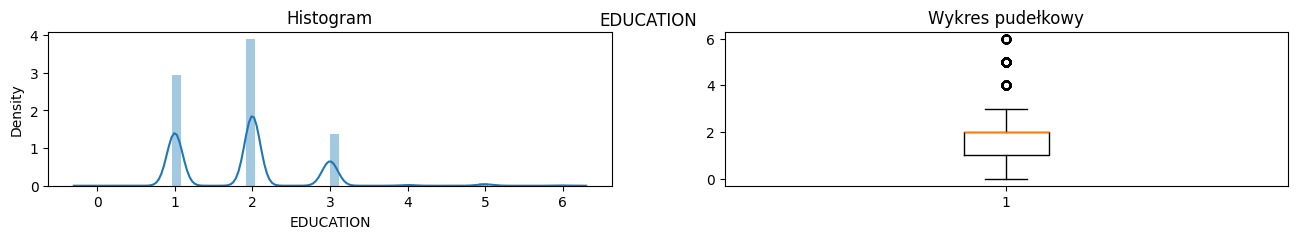

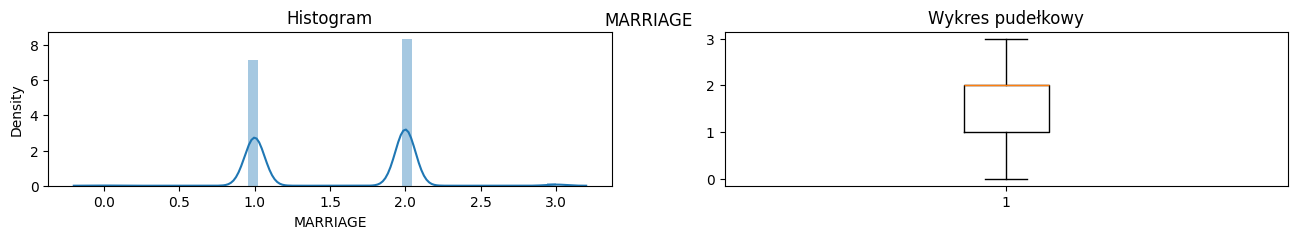

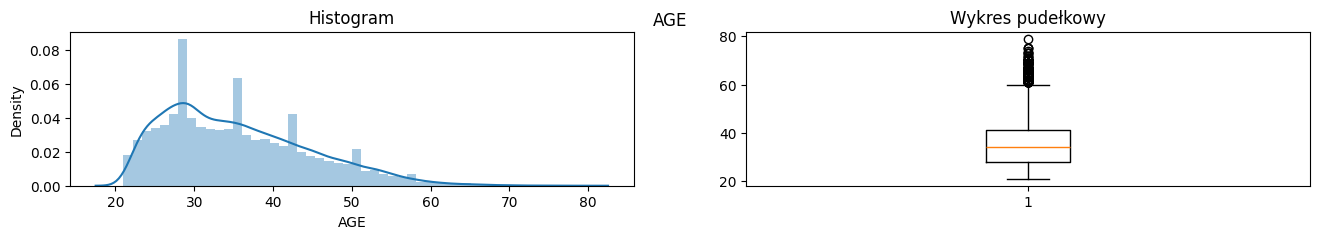

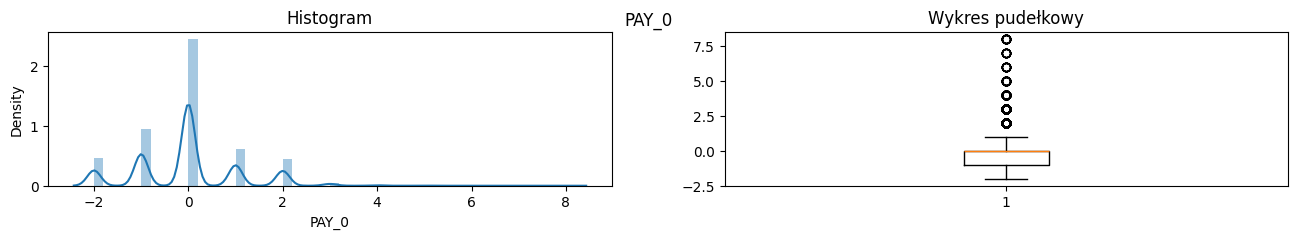

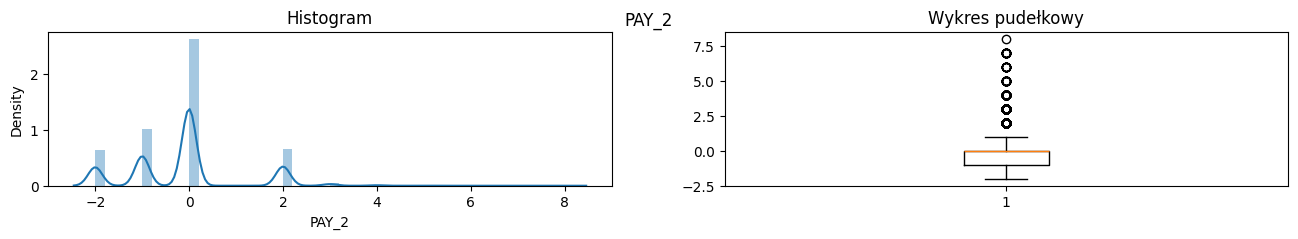

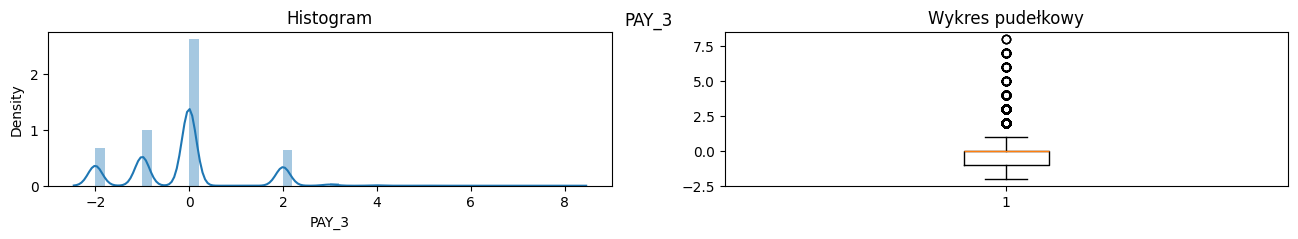

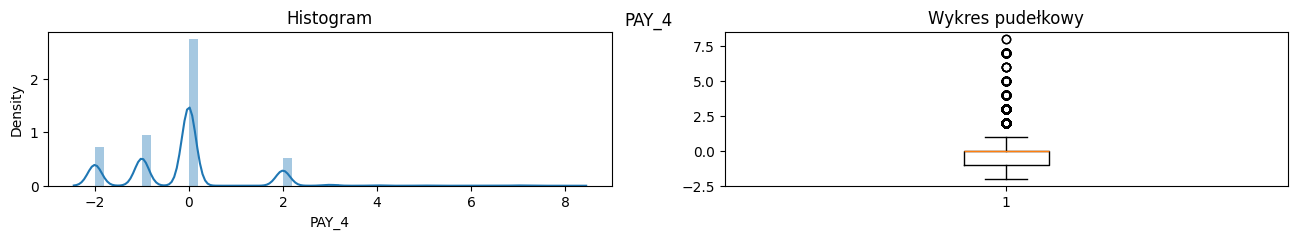

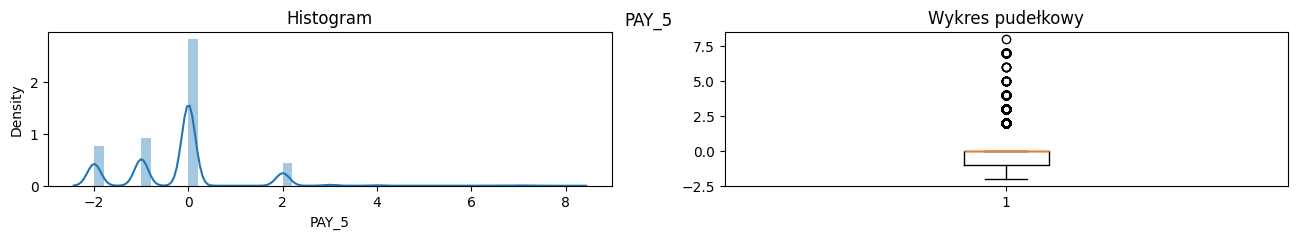

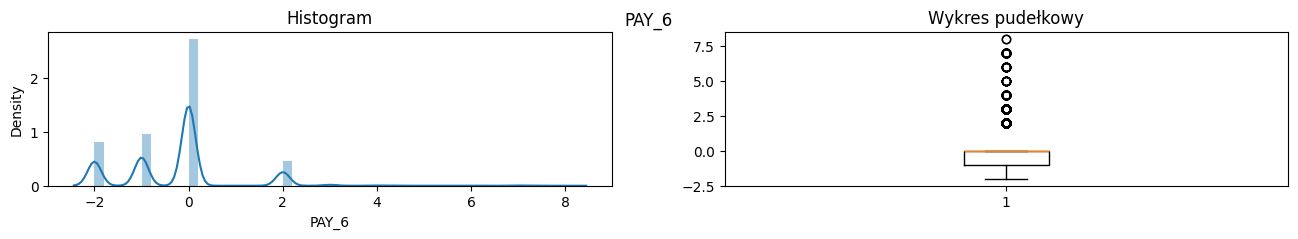

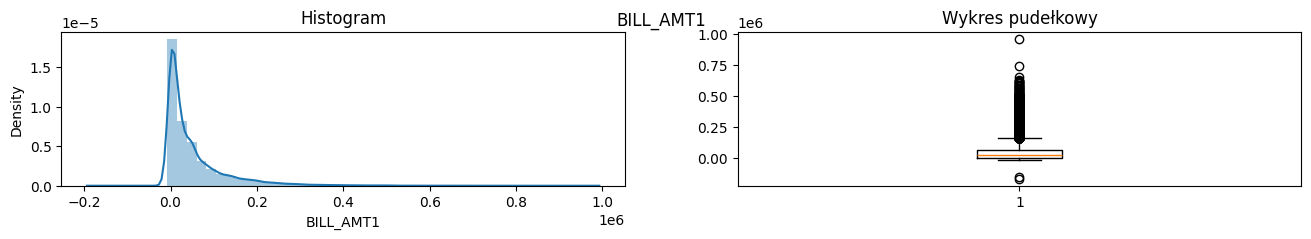

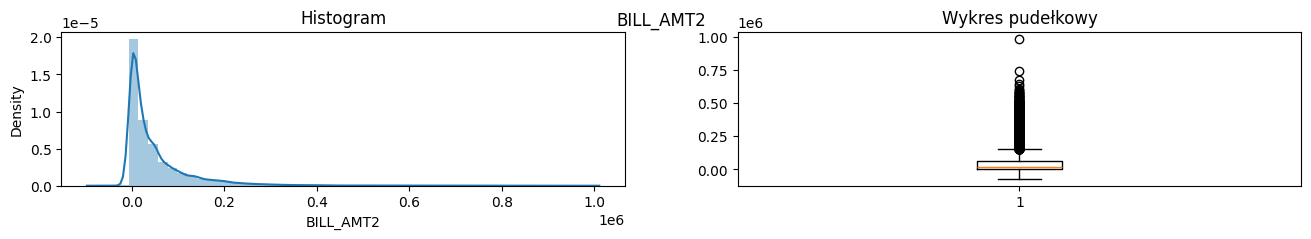

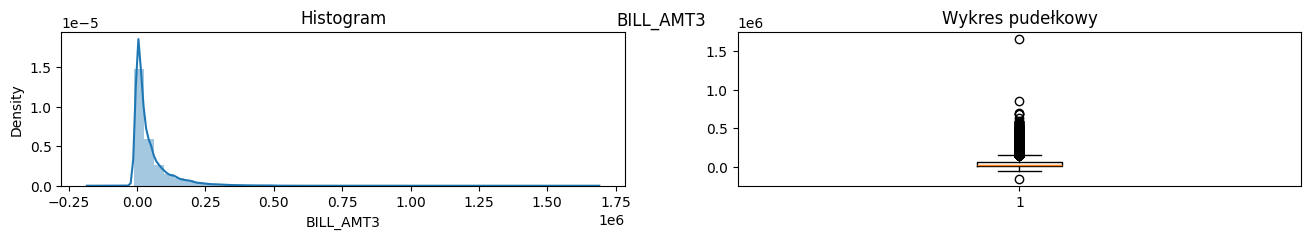

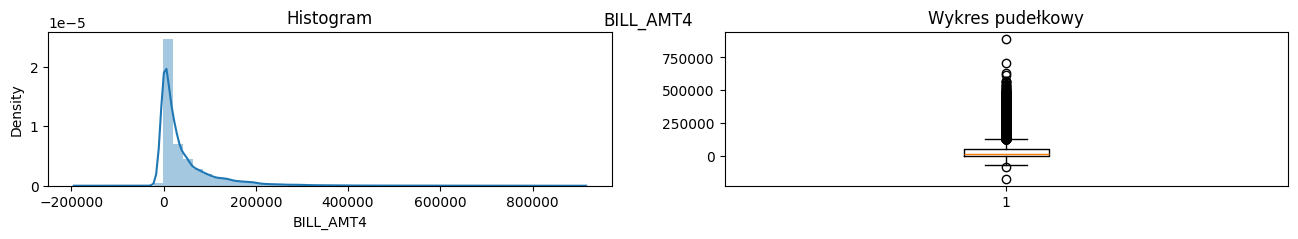

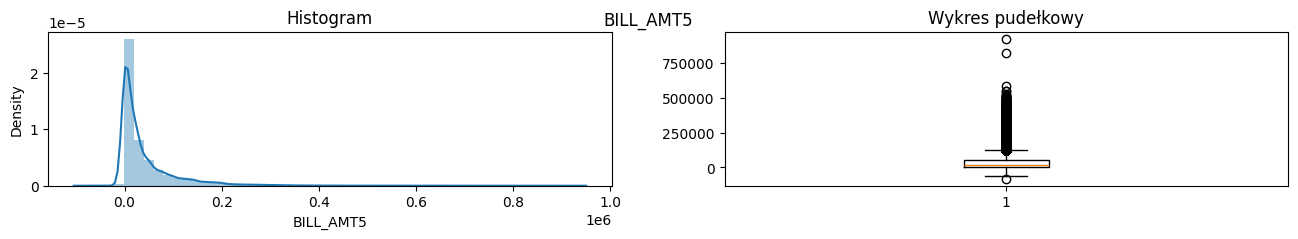

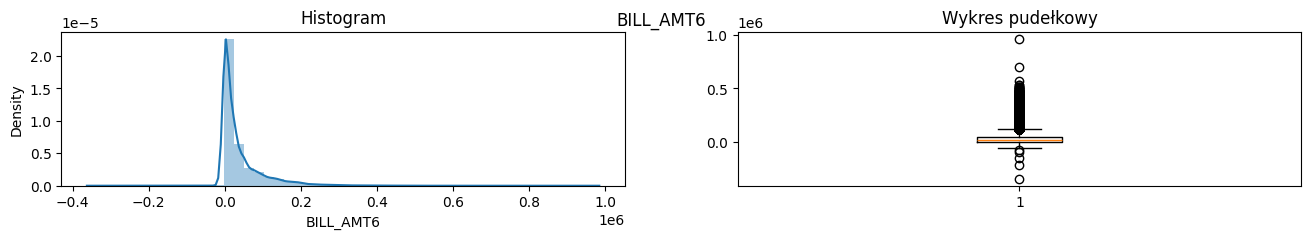

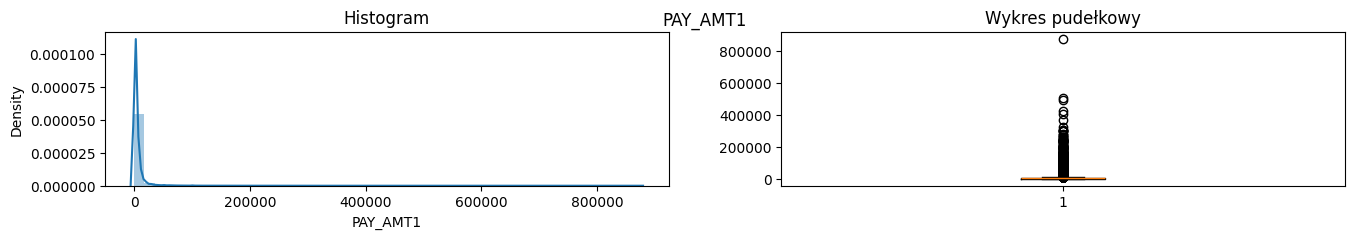

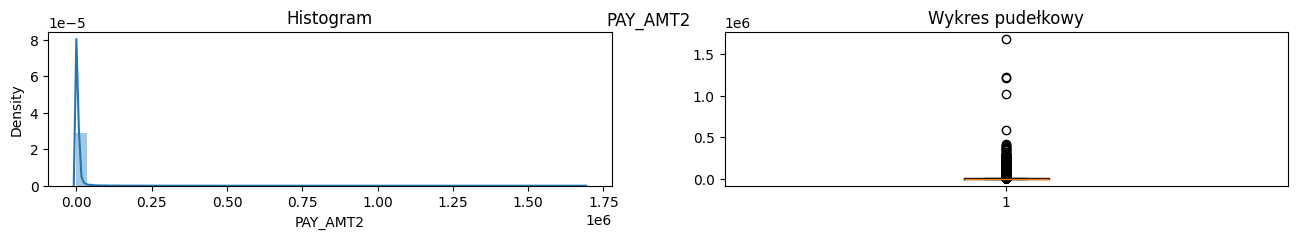

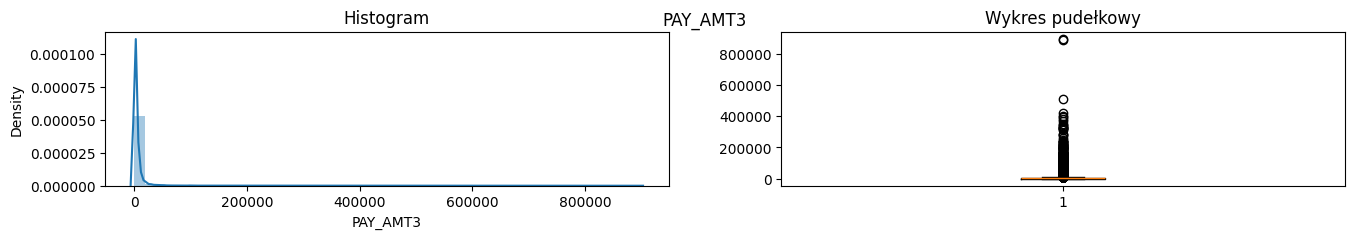

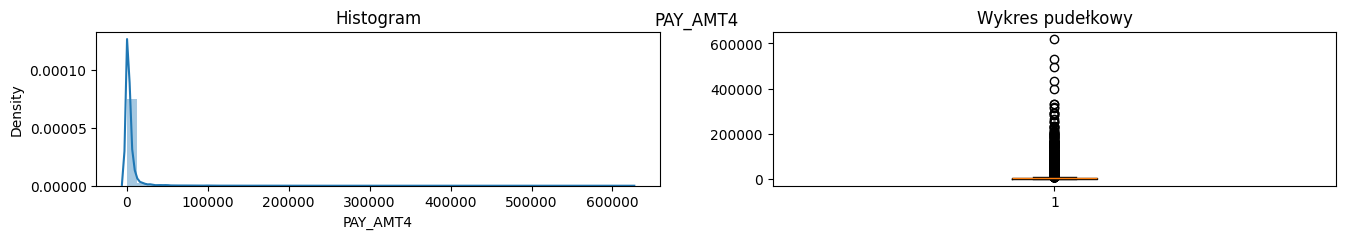

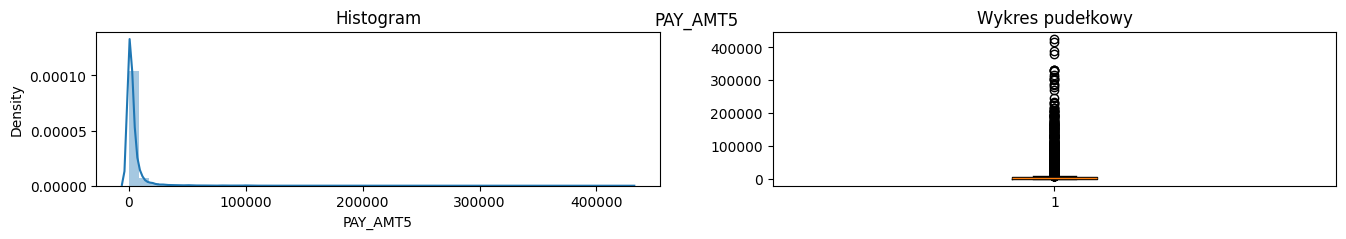

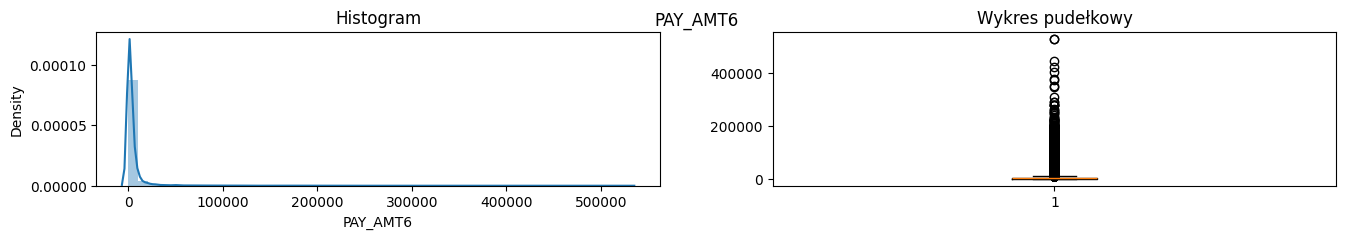

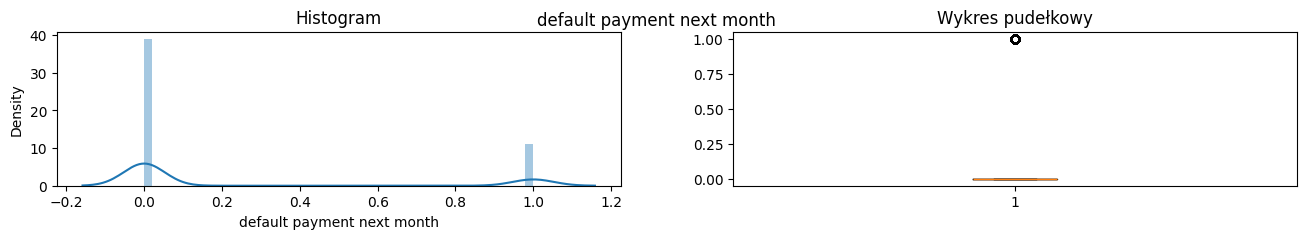

In [477]:
# histogram i wykres pudelkowy
for variable in dataframe.select_dtypes(include=np.number).columns:
    fig = plt.figure(figsize=(16, 2))
    fig.suptitle(variable, fontsize=12)
    plt.subplot(121)
    sns.distplot(dataframe[variable], kde=True, rug=False)
    plt.title('Histogram')
    plt.subplot(122)
    plt.boxplot(dataframe[variable])
    plt.title('Wykres pudełkowy')
    plt.show()

In [478]:
dataframe.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [479]:
dataframe['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

Wnioski.
 'EDUCATION' -  zawiera nieprawidłow dane. powinna zawierac wartosci 1do 4, a występują również 0,5,6, 
 'MARRIAGE' - zawiera 0,1,2,3, a powinno zawierac tylko 1,2,3
'PAY0' - 'PAY6' -zawiera warosci -2 do 8, a powinny być -1,1,2,3,4,5,6,7,8. wartosci -2 i -1 sa neijednoznaczne 
BILL_AMT I PAY_AMT nie powinny być ujemne


#### 3 Przygotowanie danych

In [480]:
# korekta danych w kolumnie 'EDUCATION', wartosci 0,5,6, zostaną zastąpione przez 4 - 'others'
dataframe['EDUCATION'] = dataframe['EDUCATION'].replace({0:4, 5:4, 6:4})


In [481]:
# korekta wartości w kolumnie 'MARIAGGE, - wartosci 0 zostana zastopione przez -3 - 'other'
dataframe['MARRIAGE'] = dataframe['MARRIAGE'].replace({0:3})


In [482]:
# korekta wartości w kolumnach PAY0 - PAY6, wartosci -1 i -2 zostana zastapione przez 0
dataframe.loc[dataframe['PAY_0'] < 0, 'PAY_0'] = 0
dataframe.loc[dataframe['PAY_2'] < 0, 'PAY_2'] = 0
dataframe.loc[dataframe['PAY_3'] < 0, 'PAY_3'] = 0
dataframe.loc[dataframe['PAY_4'] < 0, 'PAY_4'] = 0
dataframe.loc[dataframe['PAY_5'] < 0, 'PAY_5'] = 0
dataframe.loc[dataframe['PAY_6'] < 0, 'PAY_6'] = 0



In [483]:
# korekta wartości w koluumnach BILL_AMT1-6 i PAY_AMT1-6, wartosci ujemne zostana zastana usuniete
dataframe = dataframe[(dataframe['BILL_AMT1'] >= 0) & (dataframe['PAY_AMT1'] >= 0)]
dataframe = dataframe[(dataframe['BILL_AMT2'] >= 0) & (dataframe['PAY_AMT2'] >= 0)]
dataframe = dataframe[(dataframe['BILL_AMT3'] >= 0) & (dataframe['PAY_AMT3'] >= 0)]
dataframe = dataframe[(dataframe['BILL_AMT4'] >= 0) & (dataframe['PAY_AMT4'] >= 0)]
dataframe = dataframe[(dataframe['BILL_AMT5'] >= 0) & (dataframe['PAY_AMT5'] >= 0)]
dataframe = dataframe[(dataframe['BILL_AMT6'] >= 0) & (dataframe['PAY_AMT6'] >= 0)]



In [484]:
dataframe.shape

(28070, 25)

In [485]:


# obliczenie macierzy korelacji
corr_matrix = dataframe.corr(numeric_only=True).abs()  # wartość bezwzględna
print(corr_matrix)


                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.029251  0.020748   0.033319   
LIMIT_BAL                   0.029251   1.000000  0.029313   0.229599   
SEX                         0.020748   0.029313  1.000000   0.011764   
EDUCATION                   0.033319   0.229599  0.011764   1.000000   
MARRIAGE                    0.027716   0.108123  0.030363   0.140082   
AGE                         0.016119   0.139933  0.091536   0.186800   
PAY_0                       0.018837   0.174817  0.037063   0.056744   
PAY_2                       0.010851   0.197247  0.047479   0.061682   
PAY_3                       0.020254   0.193059  0.044261   0.052350   
PAY_4                       0.011258   0.182994  0.042897   0.050392   
PAY_5                       0.022338   0.170129  0.041559   0.038015   
PAY_6                       0.034171   0.169904  0.035168   0.027557   
BILL_AMT1                   0.019665   0.312220  0.036332   0.00

In [486]:

# Obliczenie macierz korelacji
corr_matrix = dataframe.corr().abs()

# Górna trójkątna macierz, żeby uniknąć duplikatów
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Próg korelacji
threshold = 0.80

#  kolumny do usunięcia
to_drop = [col for col in upper.columns if any(upper[col] > threshold)]

# Usuwam kolumny niosące redundantne dane
dataframe_reduced = dataframe.drop(columns=to_drop)

print(f"Usunięto {len(to_drop)} kolumn o silnej korelacji: {to_drop}")
print(f"Nowy wymiar danych: {dataframe_reduced.shape}")


Usunięto 5 kolumn o silnej korelacji: ['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
Nowy wymiar danych: (28070, 20)


### 4 Feature Engineering - Inżynieria cech

In [487]:
features = [col for col in dataframe.columns if col != 'default payment next month']
target = 'default payment next month'
X, y = dataframe[features], dataframe[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,0,0,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,0,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,0,0,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,29995,80000,1,2,2,34,2,2,2,2,...,79384,77519,82607,81158,7000,3500,0,7000,0,4000
29995,29996,220000,1,3,1,39,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,29997,150000,1,3,2,43,0,0,0,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,29998,30000,1,2,2,37,4,3,2,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100



y:


0        1
1        1
2        0
3        0
4        0
        ..
29994    1
29995    0
29996    0
29997    1
29999    1
Name: default payment next month, Length: 28070, dtype: int64

In [488]:
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))
'''


# Podział danych ---
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

print("Rozmiary zbiorów:")
print("Treningowy:", X_train.shape)
print("Walidacyjny:", X_val.shape)
print("Testowy:", X_test.shape)

Rozmiary zbiorów:
Treningowy: (16842, 24)
Walidacyjny: (5614, 24)
Testowy: (5614, 24)


### 5 Modelowanie i ewaluacja

In [489]:
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

metrics_dataframe = pd.DataFrame(columns=['Model', 'F1_score', 'AUC'])
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    global metrics_dataframe
    models.append(model)
    models_names.append(name)

    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba)

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()

    # ROC curves (dla wieloklasowej – osobno dla każdej klasy)
    n_classes = predictions_proba.shape[1]
    y_bin = pd.get_dummies(y_checked)  # binarizacja etykiet

    plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_bin.iloc[:, i], predictions_proba[:, i])
        plt.plot(fpr, tpr, label=f'Class {i}')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.show()

    # metryki globalne
    f1_metric = f1_score(y_checked, predictions, average='weighted')
    auc_metric = roc_auc_score(y_bin, predictions_proba, multi_class='ovr', average='weighted')

    metrics_dataframe = pd.concat([
        metrics_dataframe,
        pd.DataFrame([{'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric}])
    ], ignore_index=True)

    return metrics_dataframe

#### drzewo decyzyjne z zapisem do mlflow

In [490]:
params = {
    "criterion": "gini",
    "max_depth": 5,
    "random_state": 42
}

In [491]:
#  Rozpoczęcie eksperymentu MLflow
# --- 1. Ustawienia MLflow (lokalny folder dla runs i artefaktów) ---
mlflow.end_run()
mlflow.set_tracking_uri("file:///D:/Kodilla_AI_ML/mlruns")

mlflow.set_experiment("Decision_Tree_with_Validation")

<Experiment: artifact_location='file:///D:/Kodilla_AI_ML/mlruns/383303711116949400', creation_time=1762107177575, experiment_id='383303711116949400', last_update_time=1762107177575, lifecycle_stage='active', name='Decision_Tree_with_Validation', tags={}>

In [492]:
with mlflow.start_run(run_name="drzewo_v1"):
    #  Trenowanie i trenowanie modelu drzewa decyzyjnego
    model_tree = DecisionTreeClassifier(**params)
    model_tree.fit(X_train, y_train)

In [493]:
#ocena na danych walidacyjnych
y_val_pred = model_tree.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)

print("\n Wyniki walidacji:")
print("Dokładność (accuracy):", val_acc)
print(classification_report(y_val, y_val_pred))


 Wyniki walidacji:
Dokładność (accuracy): 0.8115425721410758
              precision    recall  f1-score   support

           0       0.83      0.94      0.89      4351
           1       0.65      0.35      0.46      1263

    accuracy                           0.81      5614
   macro avg       0.74      0.65      0.67      5614
weighted avg       0.79      0.81      0.79      5614



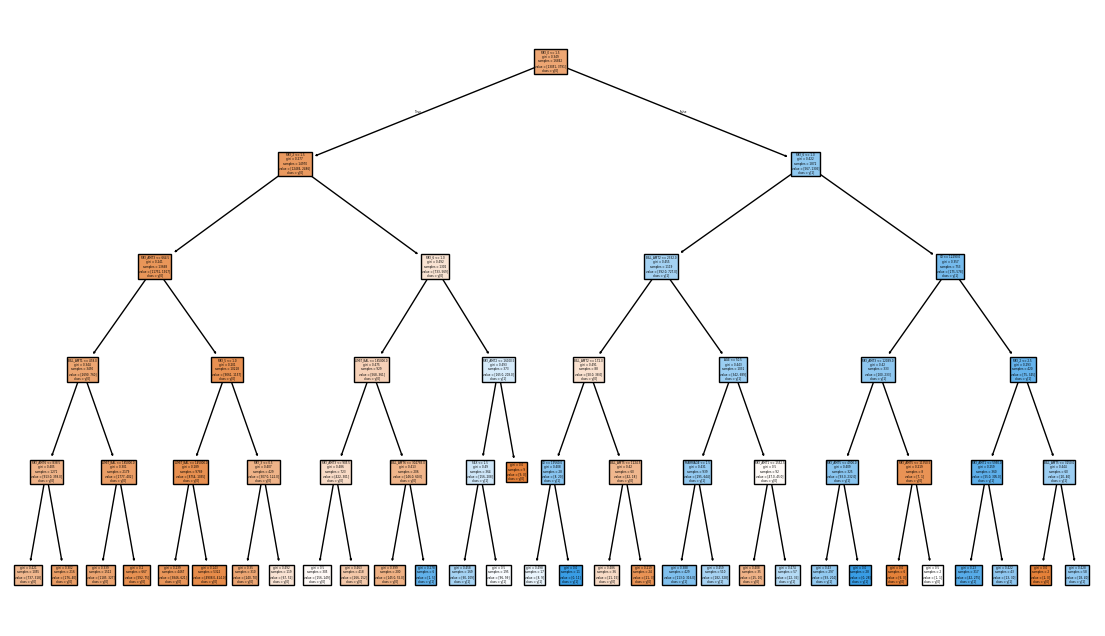

In [494]:
#  Wizualizacja drzewa

#plt.figure(figsize=(14, 8))
#plot_tree(model_tree,filled=True, feature_names=X.columns, class_names=True)
#plt.show()


plt.figure(figsize=(14, 8))
plot_tree(model_tree, filled=True, feature_names=X.columns, class_names=True)
plt.show()
plt.title("Decision Tree Visualization")
plt.tight_layout()
plt.savefig("tree_plot.png")
plt.close()

In [495]:
# predykcja na danych testowych
y_test_pred = model_tree.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4350
           1       0.68      0.39      0.49      1264

    accuracy                           0.82      5614
   macro avg       0.76      0.67      0.69      5614
weighted avg       0.81      0.82      0.80      5614



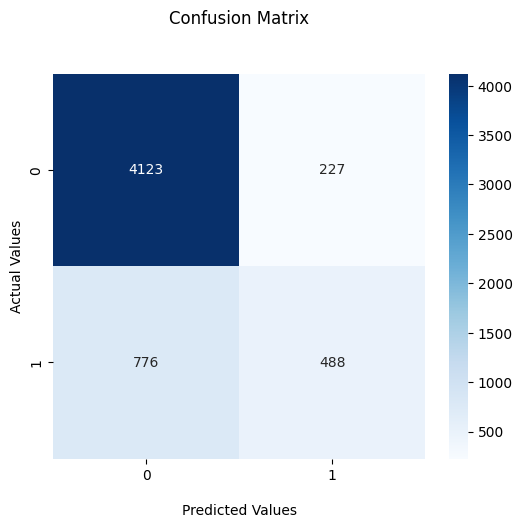

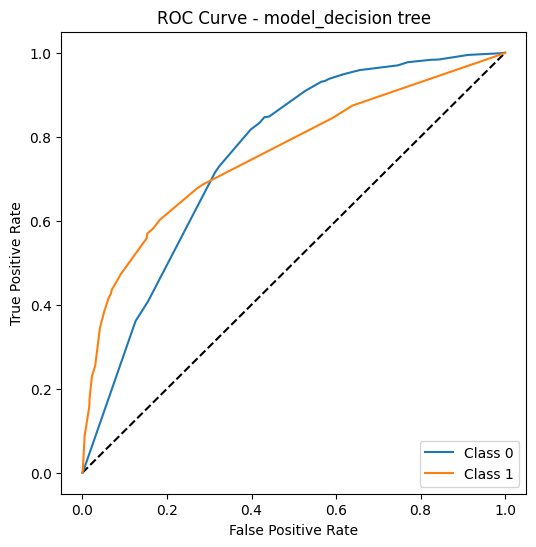

,Model,F1_score,AUC
0,model_decision tree,0.801861,0.757784


In [496]:
# metryki dla zbioru testowego
calculate_metrics(model_tree, 'model_decision tree', X_test, y_test)

In [497]:
   #  Logowanie parametrów i metryk
mlflow.log_params(params)
mlflow.log_metric("val_accuracy", val_acc)
mlflow.log_metric("test_accuracy", test_acc)

    #  Logowanie klasyfikacji jako tekst
report = classification_report(y_val, y_val_pred, output_dict=False)
mlflow.log_text(report, "classification_report.txt")

 #  Logowanie wykresu drzewa
mlflow.log_artifact("tree_plot.png")

    #  Logowanie modelu
mlflow.sklearn.log_model(model_tree, "model")

print(" Run zapisany w MLflow")


2025/11/03 01:27:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 Run zapisany w MLflow


#### AddBoost z PCA , piplinem i z zapisem do mlflow

In [498]:
#  Rozpoczęcie eksperymentu MLflow
# --- 1. Ustawienia MLflow (lokalny folder dla runs i artefaktów) ---
mlflow.end_run()
mlflow.set_tracking_uri("file:///D:/Kodilla_AI_ML/mlruns")

mlflow.set_experiment("AddBoost_with_Validation")

<Experiment: artifact_location='file:///D:/Kodilla_AI_ML/mlruns/825371492205513123', creation_time=1762109370927, experiment_id='825371492205513123', last_update_time=1762109370927, lifecycle_stage='active', name='AddBoost_with_Validation', tags={}>

In [499]:
# Preprocessing


num_features =  X_train.columns

numeric_preparation = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])




# transformer = wartości numeryczne oraz kategoryczne
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
  
])
# budowa Pipeline
model_pipeline_v2 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('addBoost',AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20), n_estimators=35,learning_rate=0.1,random_state=42) )])

In [500]:
### trening
with mlflow.start_run():
    model_pipeline_v2.fit(X_train, y_train)


In [501]:
 # Predykcje na walidacji
#ocena na danych walidacyjnych
y_val_pred = model_pipeline_v2.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)

print("\n Wyniki walidacji:")
print("Dokładność (accuracy):", val_acc)
print(classification_report(y_val, y_val_pred))


 Wyniki walidacji:
Dokładność (accuracy): 0.7965799786248664
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4351
           1       0.58      0.33      0.42      1263

    accuracy                           0.80      5614
   macro avg       0.71      0.63      0.65      5614
weighted avg       0.77      0.80      0.77      5614



In [502]:
# predykcja na danych testowych
y_test_pred = model_pipeline_v2.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

In [503]:
   #  Logowanie parametrów i metryk
mlflow.log_params(params)
mlflow.log_metric("val_accuracy", val_acc)
mlflow.log_metric("test_accuracy", test_acc)

    #  Logowanie klasyfikacji jako tekst
report = classification_report(y_val, y_val_pred, output_dict=False)
mlflow.log_text(report, "classification_report.txt")



    #  Logowanie modelu
mlflow.sklearn.log_model(model_pipeline_v2, "model")

print(" Run zapisany w MLflow")

2025/11/03 01:27:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 Run zapisany w MLflow


              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4350
           1       0.60      0.35      0.44      1264

    accuracy                           0.80      5614
   macro avg       0.72      0.64      0.66      5614
weighted avg       0.78      0.80      0.78      5614



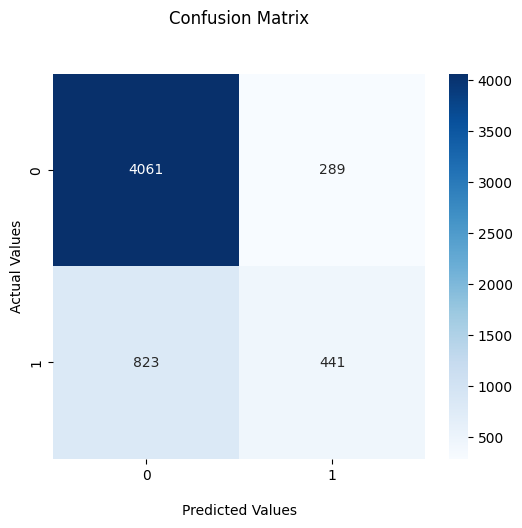

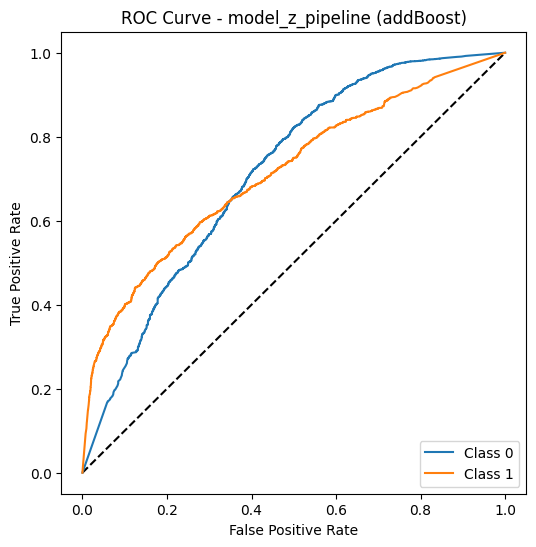

,Model,F1_score,AUC
0,model_decision tree,0.801861,0.757784
1,model_z_pipeline (addBoost),0.781128,0.713792


In [504]:
# obliczanie metryk
calculate_metrics(model_pipeline_v2, 'model_z_pipeline (addBoost)', X_test, y_test)

In [505]:
model_pipeline_v2.named_steps.keys()

dict_keys(['preprocessor', 'addBoost'])

#### SVC z grid search i z zapisem do mlflow

In [506]:
#  Rozpoczęcie eksperymentu MLflow
# --- 1. Ustawienia MLflow (lokalny folder dla runs i artefaktów) ---
mlflow.end_run()
mlflow.set_tracking_uri("file:///D:/Kodilla_AI_ML/mlruns")

mlflow.set_experiment("SVC_with_Validation")

<Experiment: artifact_location='file:///D:/Kodilla_AI_ML/mlruns/249638271654905002', creation_time=1762110369200, experiment_id='249638271654905002', last_update_time=1762110369200, lifecycle_stage='active', name='SVC_with_Validation', tags={}>

In [507]:
#  Definicja modelu pipeline  SVC
model_pipeline_v1 = Pipeline([
    ('preprocessor', preprocessor),  # zakładam, że masz zdefiniowany preprocessor
    ('svc', SVC(probability=True, random_state=42))
])
# Parametry siatki
params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.95],
    'svc__C': [0.1, 1, 5],
    'svc__kernel': ['linear', 'rbf']
}

# Grid search z walidacją krzyżową (tylko na zbiorze treningowym)
grid_search = GridSearchCV(
    model_pipeline_v1,
    params,
    cv=5,
    n_jobs=-1,
    verbose=3,
    scoring='f1_macro')







In [508]:
# Trenowanie 
with mlflow.start_run(run_name="SVC_GridSearchCV") as run:
    grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [509]:
   # Najlepsze parametry i model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)
print(best_model)

{'preprocessor__numeric_preprocessing__pca__n_components': 0.95, 'svc__C': 1, 'svc__kernel': 'linear'}
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_preprocessing',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object'))])),
                ('svc',
                 SVC(C=1, kernel='linear', probability=True, rando

In [510]:
 # Predykcje na walidacji
#ocena na danych walidacyjnych
y_val_pred = best_model.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)

print("\n Wyniki walidacji:")
print("Dokładność (accuracy):", val_acc)
print(classification_report(y_val, y_val_pred))


 Wyniki walidacji:
Dokładność (accuracy): 0.7964018525115782
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4351
           1       0.56      0.43      0.48      1263

    accuracy                           0.80      5614
   macro avg       0.70      0.66      0.68      5614
weighted avg       0.78      0.80      0.79      5614



In [511]:
# predykcja na danych testowych
y_test_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

In [512]:
   #  Logowanie parametrów i metryk
mlflow.log_params(params)
mlflow.log_metric("val_accuracy", val_acc)
mlflow.log_metric("test_accuracy", test_acc)

    #  Logowanie klasyfikacji jako tekst
report = classification_report(y_val, y_val_pred, output_dict=False)
mlflow.log_text(report, "classification_report.txt")



    #  Logowanie modelu
mlflow.sklearn.log_model(model_pipeline_v2, "model")

print(" Run zapisany w MLflow")

2025/11/03 03:46:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 Run zapisany w MLflow


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4350
           1       0.59      0.46      0.52      1264

    accuracy                           0.81      5614
   macro avg       0.72      0.68      0.70      5614
weighted avg       0.79      0.81      0.80      5614



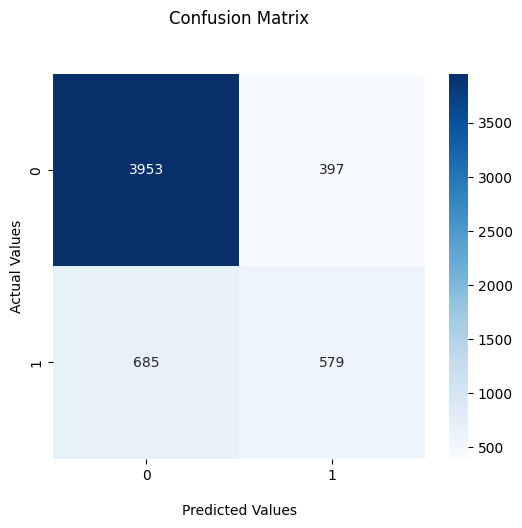

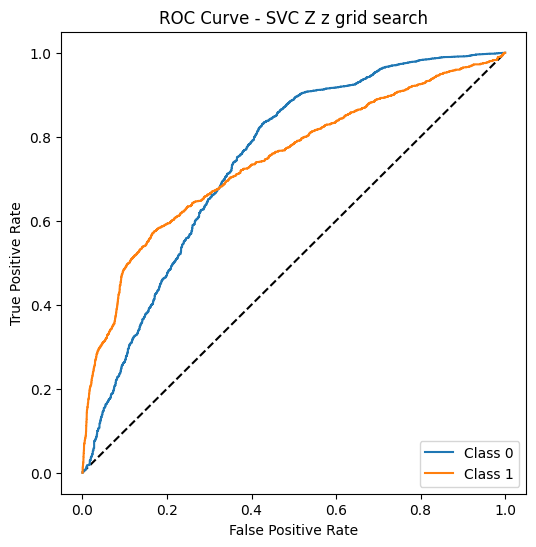

,Model,F1_score,AUC
0,model_decision tree,0.801861,0.757784
1,model_z_pipeline (addBoost),0.781128,0.713792
2,SVC Z z grid search,0.797965,0.743438


In [513]:
# obliczanie metryk
calculate_metrics(best_model, 'SVC Z z grid search', X_test, y_test)

#### Siec neuronowa z walidacja i zapisem do mlflow

In [514]:
#  Rozpoczęcie eksperymentu MLflow
# --- 1. Ustawienia MLflow (lokalny folder dla runs i artefaktów) ---
mlflow.end_run()
mlflow.set_tracking_uri("file:///D:/Kodilla_AI_ML/mlruns")

mlflow.set_experiment("NN_with_Validation")

<Experiment: artifact_location='file:///D:/Kodilla_AI_ML/mlruns/112534881789975170', creation_time=1762114912824, experiment_id='112534881789975170', last_update_time=1762114912824, lifecycle_stage='active', name='NN_with_Validation', tags={}>

In [515]:
#  Standaryzacja cech
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [516]:
#  Start eksperymentu MLflow
mlflow.set_experiment("credit_default_nn")

<Experiment: artifact_location='file:///D:/Kodilla_AI_ML/mlruns/818442732427699771', creation_time=1762114451823, experiment_id='818442732427699771', last_update_time=1762114451823, lifecycle_stage='active', name='credit_default_nn', tags={}>

In [517]:
#  Budowa modelu MLP
def build_model(input_dim):
    model_NN = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_dim=input_dim),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model_NN.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model_NN

In [518]:
# budowa modelu

with mlflow.start_run(run_name="NN_with_validation"):

    model_NN = build_model(X_train.shape[1])

In [519]:
# Trenowanie modelu z walidacją
history = model_NN.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=30,
        batch_size=128,
        verbose=1
    )

Epoch 1/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7893 - loss: 0.4902 - val_accuracy: 0.8066 - val_loss: 0.4566
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8127 - loss: 0.4531 - val_accuracy: 0.8074 - val_loss: 0.4506
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8146 - loss: 0.4468 - val_accuracy: 0.8083 - val_loss: 0.4512
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8153 - loss: 0.4429 - val_accuracy: 0.8098 - val_loss: 0.4465
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8191 - loss: 0.4420 - val_accuracy: 0.8099 - val_loss: 0.4458
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8187 - loss: 0.4387 - val_accuracy: 0.8115 - val_loss: 0.4454
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8207 - loss: 0.4386 - val_accuracy: 0.8112 - val_loss: 0.4451
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8201 - loss: 0.4371 - val_accuracy: 0.

In [520]:
 # Predykcje na walidacji


# Predykcje
y_val_pred = model_NN.predict(X_val)

# Zamiana na etykiety 0/1
y_val_pred = (y_val_pred > 0.5).astype(int).ravel()

# Ocena
val_acc = accuracy_score(y_val, y_val_pred)

print("\nWyniki walidacji:")
print("Dokładność (accuracy):", val_acc)
print(classification_report(y_val, y_val_pred))


176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Wyniki walidacji:
Dokładność (accuracy): 0.8115425721410758
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4351
           1       0.64      0.36      0.47      1263

    accuracy                           0.81      5614
   macro avg       0.74      0.65      0.68      5614
weighted avg       0.79      0.81      0.79      5614



In [521]:
# predykcja na danych testowych

y_test_pred = model_NN.predict(X_test)

# Zamiana na etykiety binarne (0 lub 1)
y_test_pred = (y_test_pred > 0.5).astype(int).ravel()

#  Obliczanie dokładności
test_acc = accuracy_score(y_test, y_test_pred)

print("\nWyniki testu:")
print("Dokładność (accuracy):", test_acc)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Wyniki testu:
Dokładność (accuracy): 0.8192019950124688
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4350
           1       0.67      0.39      0.49      1264

    accuracy                           0.82      5614
   macro avg       0.75      0.67      0.69      5614
weighted avg       0.80      0.82      0.80      5614

[[4102  248]
 [ 767  497]]


In [522]:
#  Logowanie parametrów i metryk
mlflow.log_params(params)
mlflow.log_metric("val_accuracy", val_acc)
mlflow.log_metric("test_accuracy", test_acc)

    #  Logowanie klasyfikacji jako tekst
report = classification_report(y_val, y_val_pred, output_dict=False)
mlflow.log_text(report, "classification_report.txt")



    #  Logowanie modelu
mlflow.sklearn.log_model(model_pipeline_v2, "model")

print(" Run zapisany w MLflow")

2025/11/03 03:46:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 Run zapisany w MLflow


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4350
           1       0.67      0.39      0.49      1264

    accuracy                           0.82      5614
   macro avg       0.75      0.67      0.69      5614
weighted avg       0.80      0.82      0.80      5614



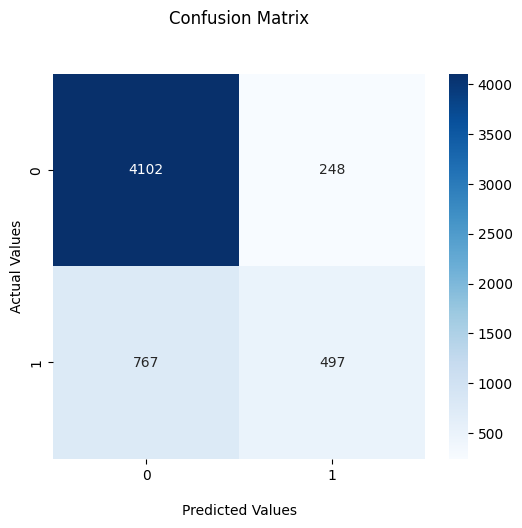

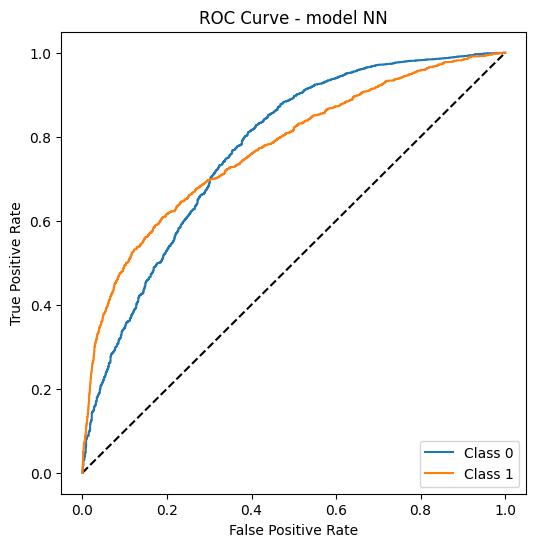

,Model,F1_score,AUC
0,model_decision tree,0.801861,0.757784
1,model_z_pipeline (addBoost),0.781128,0.713792
2,SVC Z z grid search,0.797965,0.743438
3,model NN,0.800938,0.771586


In [523]:
# obliczanie metryk
class KerasWrapper:
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        # zwraca etykiety klas
        return (self.model.predict(X) > 0.5).astype(int).ravel()

    def predict_proba(self, X):
        proba = self.model.predict(X)
        # jeśli wynik jest (n_samples, 1), zamieniamy na (n_samples, 2)
        if proba.shape[1] == 1:
            proba = np.hstack([1 - proba, proba])
        return proba


calculate_metrics(KerasWrapper(model_NN), 'model NN', X_test, y_test)


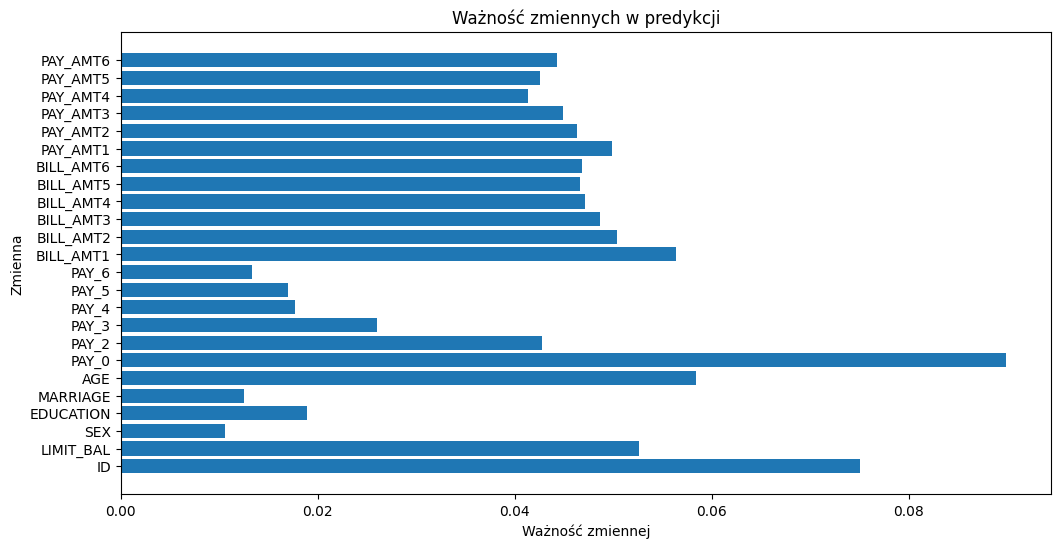

In [524]:
# wizualizacja waznosci cech
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# 4. Pobranie ważności zmiennych
importances = model.feature_importances_
feature_names = X.columns

# 5. Stworzenie wykresu
plt.figure(figsize=(12,6))
plt.barh(feature_names, importances)
plt.xlabel('Ważność zmiennej')
plt.ylabel('Zmienna')
plt.title('Ważność zmiennych w predykcji')
plt.show()

### 6 wdrożenie

In [525]:
joblib.dump(model_tree, 'model_tree.pkl')
joblib.dump(model_pipeline_v2, 'model_pipeline_v2.pkl')
joblib.dump(model_pipeline_v1, 'model_pipeline_v1.pkl')
joblib.dump(model_NN, 'model_NN.pkl')



['model_NN.pkl']